# Handle NaNs

By default, WB-X does not skip NaNs in the aggregation. This is to avoid unexpected and possible erroneous NaNs staying undetected. However, sometimes NaNs do appear in the targets (e.g. for radar data).

The explicit way to handle this is to add a NaN mask. This is an option in all data loaders and will add a coordinate called mask that is True for non-NaN values. Let's take a look at an example.

In [1]:
import numpy as np
from weatherbenchX import test_utils
from weatherbenchX.data_loaders import xarray_loaders

In [2]:
predictions = test_utils.mock_prediction_data()

In [3]:
predictions = predictions.where(predictions.latitude >0, np.nan)

In [4]:
predictions

<xarray.Dataset> Size: 44MB
Dimensions:               (prediction_timedelta: 11, time: 366, latitude: 19,
                           longitude: 36, level: 3)
Coordinates:
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 88B 0 days ....
  * time                  (time) datetime64[ns] 3kB 2020-01-01 ... 2020-12-31
  * latitude              (latitude) float64 152B -90.0 -80.0 ... 80.0 90.0
  * longitude             (longitude) float64 288B 0.0 10.0 20.0 ... 340.0 350.0
  * level                 (level) int64 24B 500 700 850
Data variables:
    geopotential          (prediction_timedelta, time, latitude, longitude, level) float32 33MB ...
    2m_temperature        (prediction_timedelta, latitude, longitude, time) float32 11MB ...

In [5]:
data_loader = xarray_loaders.PredictionsFromXarray(
    ds=predictions,
    add_nan_mask=True
)

In [6]:
chunk = data_loader.load_chunk(
    np.array(['2020-01-01T00'], dtype='datetime64'),
    np.array([24], dtype='timedelta64[h]')
)

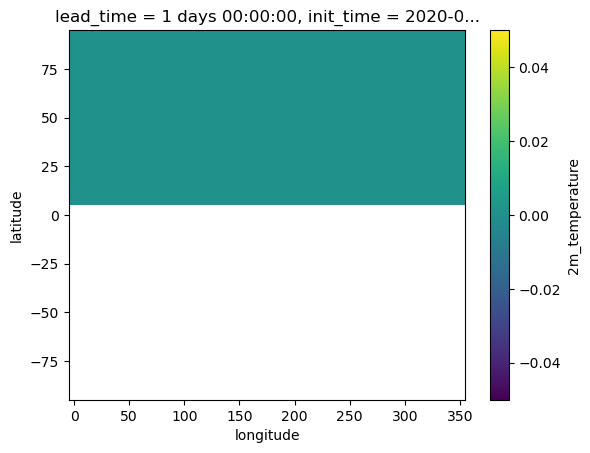

In [7]:
chunk['2m_temperature'].plot();

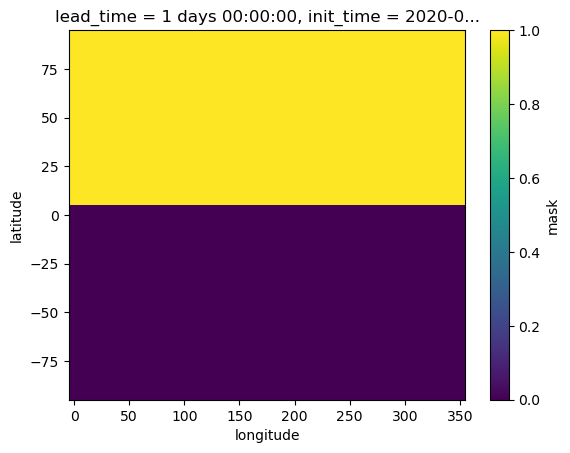

In [8]:
chunk['2m_temperature'].mask.plot();

In the Aggregator, if `masked=True` (default is False), the masked out values will then be ignored.

Note that only target OR prediction can have a mask. Generally, best practice is to try to avoid having NaNs in the predictions.

If this isn't possible, there is a brute force method `skipna` in the aggregator that will ignore all NaNs in the aggregation. However, caution is required with this option since this could also skip unexpected NaNs.